# Proyecto Final: Análisis de Big Data con Spark y HDFS
## Visión general:
Este proyecto está diseñado para ayudarte a adquirir experiencia práctica con Spark y HD
Trabajarás con tu propio conjunto de datos y utilizarás Spark para analizar los datos, obte
información y generar resultados en diferentes formatos de salida y fuentes. También util
Spark Structured Streaming para realizar análisis en tiempo real de los datos utilizando
## Entorno:
Ejecutarás este proyecto en tu propia computadora personal utilizando un entorno con
contenedores Docker que contienen Spark 3 y HDFS Py

## Integrantes del equipo:
* Alejandra Elizabeth Trujillo Navarro
* Carla Georgina Sanchez Arreguin
* Jessica Montserrat Morales Enrique
* Sofia Daniela Rodriguez Saenz

# 1. Proyecto: IT Salary Survey for EU region
**Dataset:** https://www.kaggle.com/datasets/parulpandey/2020-it-salary-survey-for-eu-region
<br/>
<br/>
<div style="text-align: center;">
    <img src="images/img212.png" width="400" height="400" alt="image">
    <img src="images/img213.png" width="339" height="339" alt="image">
</div>

## 2.1 Objetivos general:
Analizar las tendencias y dinámicas laborales en el sector tecnológico a lo largo del tiempo y en función de diversos factores demográficos, económicos y empresariales, con el fin de proporcionar una visión integral de los cambios en la utilización de tecnologías, estructuras salariales, y decisiones empresariales durante y después de la pandemia de COVID-19


## 2.2 Objetivos Específicos del Proyecto

### 2.2.1. Análisis de lenguajes de programación por grupo de edad

- **Objetivo:** Determinar los lenguajes de programación más utilizados por las siguientes franjas etarias:
  - 18 a 30 años
  - 31 a 40 años
  - Mayores de 41 años

### 2.2.2. Examinación de estructuras salariales en el sector tecnológico
- **Objetivo:** Compilar un listado de salarios, ordenados de mayor a menor, especificando el puesto y la ciudad de trabajo.

### 2.2.3. Identificación de empresas con despidos durante la pandemia de COVID-19
- **Objetivo:** Listar las empresas que realizaron despidos durante la pandemia y analizar las diferencias salariales entre géneros durante este periodo.

### 2.2.4. Investigación de lenguajes de programación predominantes
- **Objetivo:** Establecer cuáles son los lenguajes de programación más utilizados en la actualidad dentro del sector tecnológico.

### 2.2.5. Estudio de diferencias en empleo y salarios por género
- **Objetivo:** Comparar las diferencia salariales en trabajadores en los diferentes géneros.

### 2.2.6. Comparación de salarios anuales de desarrolladores de Python (2018 vs. 2020)
- **Objetivo:** Analizar cómo han evolucionado los salarios anuales de los desarrolladores de Python desde 2018 hasta 2020.

### 2.2.7. Evaluación de la evolución de los lenguajes de programación más utilizados (2018-2020)
- **Objetivo:** Identificar los cinco lenguajes de programación más populares en los años 2018, 2019 y 2020 y examinar las tendencias y cambios a lo largo de estos años.


## 1. Etapa 1: 1. Conceptos básicos estructurados de PySpark con DataFrames
En esta etapa, se concentrará en cargar los datos en HDFS y usar Spark DataFrames para realizar operaciones básicas como crear esquemas, seleccionar columnas, filtrar y ordenar filas y limpieza de valores nulos.

<div style="text-align: center;">
    <img src="images/grafica.png" width="300" height="300" alt="image">
</div>

## 1.1 Código

In [1]:
# Importamos módulos para la carga y manejo de datos
import pyspark.sql.functions as f 
import pyspark.sql.types as t

In [2]:
# Creamos sesión de Spark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("IT_Salary") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/16 18:11:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
# Cargamos los datos de 2018
datasets_path = 'data/'
dataset2018_path=f'{datasets_path}/IT Salary Survey EU 2018.csv'
salaries2018 = spark.read.format('csv').option('header', True).load(dataset2018_path)

In [4]:
#Renombramos columnas para un mejor manejo de los datos
salaries2018 = salaries2018.withColumnRenamed('Total years of experience', 'YearsExperience'
).withColumnRenamed('Years of experience in Germany', 'YersExpGermany'  
).withColumnRenamed('Seniority Level', 'SeniorityLevel' 
).withColumnRenamed('Your main technology / programming language' , 'ProgrammingLanguage'
).withColumnRenamed('Other technologies/programming languages you use often', 'OtherTech'
).withColumnRenamed('Yearly brutto salary (without bonus and stocks) in EUR', 'YearSalary'
).withColumnRenamed('Yearly bonus + stocks in EUR', 'YearBonus'
).withColumnRenamed('Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country', 'PrevYearSalary'
).withColumnRenamed('Annual bonus+stocks one year ago. Only answer if staying in same country','PrevYearBonus'                   
).withColumnRenamed('Number of vacation days', 'VacationsDays'
).withColumnRenamed('Employment status', 'EmployStatus'
).withColumnRenamed('Сontract duration', 'СontractDuration' 
).withColumnRenamed('Main language at work', 'MainLanguage' 
).withColumnRenamed('Company size', 'CompanySize' 
).withColumnRenamed('Have you lost your job due to the coronavirus outbreak?', 'LostJobCoronavirus'
).withColumnRenamed('Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week', 'ShorterWorkingWeek'  
).withColumnRenamed('Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR', 'PayWorkHome'                    
)

In [5]:
salaries2018.show(truncate=False, vertical=True)

-RECORD 0--------------------------------------------------------------
 Timestamp                          | 14/12/2018 12:41:33              
 Age                                | 43                               
 Gender                             | M                                
 City                               | München                          
 Position                           | QA Ingenieur                     
 Years of experience                | 11                               
 Your level                         | Senior                           
 Current Salary                     | 77000                            
 Salary one year ago                | 76200                            
 Salary two years ago               | 68000                            
 Are you getting any Stock Options? | No                               
 MainLanguage                       | Deutsch                          
 CompanySize                        | 100-1000                  

In [6]:
# Cargamos los datos de 2019
dataset2019_path=f'{datasets_path}/IT Salary Survey EU 2019.csv'
salaries2019 = spark.read.format('csv').option('header', True).load(dataset2019_path)

In [7]:
#Renombramos columnas para un mejor manejo de los datos
salaries2019 = salaries2019.withColumnRenamed('Total years of experience', 'YearsExperience'
).withColumnRenamed('Years of experience in Germany', 'YersExpGermany'  
).withColumnRenamed('Seniority Level', 'SeniorityLevel' 
).withColumnRenamed('Your main technology / programming language' , 'ProgrammingLanguage'
).withColumnRenamed('Other technologies/programming languages you use often', 'OtherTech'
).withColumnRenamed('Yearly brutto salary (without bonus and stocks) in EUR', 'YearSalary'
).withColumnRenamed('Yearly bonus + stocks in EUR', 'YearBonus'
).withColumnRenamed('Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country', 'PrevYearSalary'
).withColumnRenamed('Annual bonus+stocks one year ago. Only answer if staying in same country','PrevYearBonus'                   
).withColumnRenamed('Number of vacation days', 'VacationsDays'
).withColumnRenamed('Employment status', 'EmployStatus'
).withColumnRenamed('Сontract duration', 'СontractDuration' 
).withColumnRenamed('Main language at work', 'MainLanguage' 
).withColumnRenamed('Company size', 'CompanySize' 
).withColumnRenamed('Have you lost your job due to the coronavirus outbreak?', 'LostJobCoronavirus'
).withColumnRenamed('Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week', 'ShorterWorkingWeek'  
).withColumnRenamed('Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR', 'PayWorkHome'                    
)

In [8]:
#Mostramos los datos 2019
salaries2019.show(truncate=False, vertical = True)

-RECORD 0----------------------------------------------------------------------------------------------------------------------------------------------
 Zeitstempel                                                                                          | 02.12.2019 11:18:26                            
 Age                                                                                                  | 33                                             
 Gender                                                                                               | Male                                           
 City                                                                                                 | Berlin                                         
 SeniorityLevel                                                                                       | Senior                                         
 Position (without seniority)                                                           

In [9]:
# Cargamos los datos de 2020
datasets_path = 'data/'
dataset2020_path=f'{datasets_path}/IT Salary Survey EU 2020.csv'
salaries2020 = spark.read.format('csv').option('header', True).load(dataset2020_path)

In [10]:
#Renombramos columnas para un mejor manejo de los datos
salaries2020 = salaries2020.withColumnRenamed('Total years of experience', 'YearsExperience'
).withColumnRenamed('Years of experience in Germany', 'YersExpGermany'  
).withColumnRenamed('Seniority Level', 'SeniorityLevel' 
).withColumnRenamed('Your main technology / programming language' , 'ProgrammingLanguage'
).withColumnRenamed('Other technologies/programming languages you use often', 'OtherTech'
).withColumnRenamed('Yearly brutto salary (without bonus and stocks) in EUR', 'YearSalary'
).withColumnRenamed('Yearly bonus + stocks in EUR', 'YearBonus'
).withColumnRenamed('Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country', 'PrevYearSalary'
).withColumnRenamed('Annual bonus+stocks one year ago. Only answer if staying in same country','PrevYearBonus'                   
).withColumnRenamed('Number of vacation days', 'VacationsDays'
).withColumnRenamed('Employment status', 'EmployStatus'
).withColumnRenamed('Сontract duration', 'СontractDuration' 
).withColumnRenamed('Main language at work', 'MainLanguage' 
).withColumnRenamed('Company size', 'CompanySize' 
).withColumnRenamed('Have you lost your job due to the coronavirus outbreak?', 'LostJobCoronavirus'
).withColumnRenamed('Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week', 'ShorterWorkingWeek'  
).withColumnRenamed('Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR', 'PayWorkHome'                    
)

In [11]:
#Mostramos los datos 2020
salaries2020.show(truncate=False, vertical = True)

-RECORD 0-------------------------------------------------------------------------------------
 Timestamp           | 24/11/2020 11:14:15                                                    
 Age                 | 26                                                                     
 Gender              | Male                                                                   
 City                | Munich                                                                 
 Position            | Software Engineer                                                      
 YearsExperience     | 5                                                                      
 YersExpGermany      | 3                                                                      
 SeniorityLevel      | Senior                                                                 
 ProgrammingLanguage | TypeScript                                                             
 OtherTech           | Kotlin, Javascript / Typesc

## 2. Etapa 2: Análisis de datos con PySpark Estructurado
En esta etapa, utilizarás Spark DataFrames para realizar análisis de datos y obtener información.
Utilizarás agregaciones y estadísticas de dataframe para responder preguntas sobre los datos.
También puedes utilizar visualizaciones para mostrar tus resultados

<div style="text-align: center;">
    <img src="images/analysis.png" width="500" height="200" alt="image">
</div>

## 2.1 Código

### 2.1.1. Investigación de lenguajes de programación predominantes
En esta sección, realizaremos un análisis de los lenguajes de programación más utilizados en el año 2020 en la empresas alemanas.

In [31]:
### Verificamos estructura de los salarios
salaries2020.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Position : string (nullable = true)
 |-- YearsExperience: string (nullable = true)
 |-- YersExpGermany: string (nullable = true)
 |-- SeniorityLevel: string (nullable = true)
 |-- ProgrammingLanguage: string (nullable = true)
 |-- OtherTech: string (nullable = true)
 |-- YearSalary: string (nullable = true)
 |-- YearBonus: string (nullable = true)
 |-- PrevYearSalary: string (nullable = true)
 |-- PrevYearBonus: string (nullable = true)
 |-- VacationsDays: string (nullable = true)
 |-- EmployStatus: string (nullable = true)
 |-- СontractDuration: string (nullable = true)
 |-- MainLanguage: string (nullable = true)
 |-- CompanySize: string (nullable = true)
 |-- Company type: string (nullable = true)
 |-- LostJobCoronavirus: string (nullable = true)
 |-- ShorterWorkingWeek: string (nullable = true)
 |-- PayWorkHome: string (nulla

In [32]:
# Usaremos la columna de ProgrammingLanguage
#Eliminamos aquellos registros vacios en las columnas de interes
from pyspark.sql.functions import col

# Eliminar los registros con valores nulos en las columnas de interés
salaries2020_clean = salaries2020.filter(
    col('ProgrammingLanguage').isNotNull() 
)

# Mostrar los primeros registros para verificar
salaries2020_clean.show(truncate=True, vertical=True)

-RECORD 0-----------------------------------
 Timestamp           | 24/11/2020 11:14:15  
 Age                 | 26                   
 Gender              | Male                 
 City                | Munich               
 Position            | Software Engineer    
 YearsExperience     | 5                    
 YersExpGermany      | 3                    
 SeniorityLevel      | Senior               
 ProgrammingLanguage | TypeScript           
 OtherTech           | Kotlin, Javascrip... 
 YearSalary          | 80000                
 YearBonus           | 5000                 
 PrevYearSalary      | 75000                
 PrevYearBonus       | 10000                
 VacationsDays       | 30                   
 EmployStatus        | Full-time employee   
 СontractDuration    | Unlimited contract   
 MainLanguage        | English              
 CompanySize         | 51-100               
 Company type        | Product              
 LostJobCoronavirus  | No                   
 ShorterWo

### 2.1.2. Diferencia entre promedios salariales del género masculino y femenino
En esta sección, exploraremos las diferencias en los salarios entre hombres y mujeres, enfocándonos específicamente en el nivel senior para obtener un análisis detallado de un segmento concreto. Iniciaremos con un análisis descriptivo estadístico para evaluar la forma de los datos.  Para ello, nos enfocaremos en el año mas reciente proporcionado en los datos, es decir 2020.

In [12]:
### Verificamos estructura de los salarios
salaries2020.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Position : string (nullable = true)
 |-- YearsExperience: string (nullable = true)
 |-- YersExpGermany: string (nullable = true)
 |-- SeniorityLevel: string (nullable = true)
 |-- ProgrammingLanguage: string (nullable = true)
 |-- OtherTech: string (nullable = true)
 |-- YearSalary: string (nullable = true)
 |-- YearBonus: string (nullable = true)
 |-- PrevYearSalary: string (nullable = true)
 |-- PrevYearBonus: string (nullable = true)
 |-- VacationsDays: string (nullable = true)
 |-- EmployStatus: string (nullable = true)
 |-- СontractDuration: string (nullable = true)
 |-- MainLanguage: string (nullable = true)
 |-- CompanySize: string (nullable = true)
 |-- Company type: string (nullable = true)
 |-- LostJobCoronavirus: string (nullable = true)
 |-- ShorterWorkingWeek: string (nullable = true)
 |-- PayWorkHome: string (nulla

In [13]:
#Verificamos numero de filas en el archivo
salaries2020.count()

1253

In [14]:
# Usaremos las columnas de Gender para filtrar entre hombres y mujeres, YearSalary como medicion del salario y Seniority level para filtrar por experiencia
#Eliminamos aquellos registros vacios en las columnas de interes
# Eliminar los registros con valores nulos en las columnas de interés
salaries2020_clean = salaries2020.filter(
    col('Gender').isNotNull() &
    col('YearSalary').isNotNull() &
    col('SeniorityLevel').isNotNull()
)

# Mostrar los primeros registros para verificar
salaries2020_clean.show(truncate=True, vertical=True)

-RECORD 0-----------------------------------
 Timestamp           | 24/11/2020 11:14:15  
 Age                 | 26                   
 Gender              | Male                 
 City                | Munich               
 Position            | Software Engineer    
 YearsExperience     | 5                    
 YersExpGermany      | 3                    
 SeniorityLevel      | Senior               
 ProgrammingLanguage | TypeScript           
 OtherTech           | Kotlin, Javascrip... 
 YearSalary          | 80000                
 YearBonus           | 5000                 
 PrevYearSalary      | 75000                
 PrevYearBonus       | 10000                
 VacationsDays       | 30                   
 EmployStatus        | Full-time employee   
 СontractDuration    | Unlimited contract   
 MainLanguage        | English              
 CompanySize         | 51-100               
 Company type        | Product              
 LostJobCoronavirus  | No                   
 ShorterWo

In [15]:
#Verificamos numero de filas en el dataframe despues de limpieza
salaries2020_clean.count()

1235

In [16]:
#Exploramos los diferentes valores de Seniority level
salaries2020_clean.dropDuplicates(['SeniorityLevel']).select('SeniorityLevel').show(truncate=False, vertical = True)

-RECORD 0---------------------------------------------------
 SeniorityLevel | Senior                                    
-RECORD 1---------------------------------------------------
 SeniorityLevel | VP                                        
-RECORD 2---------------------------------------------------
 SeniorityLevel | Student                                   
-RECORD 3---------------------------------------------------
 SeniorityLevel | CTO                                       
-RECORD 4---------------------------------------------------
 SeniorityLevel | Principal                                 
-RECORD 5---------------------------------------------------
 SeniorityLevel | Director                                  
-RECORD 6---------------------------------------------------
 SeniorityLevel | intern                                    
-RECORD 7---------------------------------------------------
 SeniorityLevel | No level                                  
-RECORD 8---------------

In [17]:
#Filtramos solo los registros en nivel senior usando SQL
# Registrar el DataFrame como una vista temporal
salaries2020_clean.createOrReplaceTempView("salaries2020_clean")
salaries2020_senior = spark.sql("""
    SELECT * FROM salaries2020_clean WHERE SeniorityLevel = 'Senior'
""")
salaries2020_senior.count()

562

In [18]:
salaries2020_senior.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Position : string (nullable = true)
 |-- YearsExperience: string (nullable = true)
 |-- YersExpGermany: string (nullable = true)
 |-- SeniorityLevel: string (nullable = true)
 |-- ProgrammingLanguage: string (nullable = true)
 |-- OtherTech: string (nullable = true)
 |-- YearSalary: string (nullable = true)
 |-- YearBonus: string (nullable = true)
 |-- PrevYearSalary: string (nullable = true)
 |-- PrevYearBonus: string (nullable = true)
 |-- VacationsDays: string (nullable = true)
 |-- EmployStatus: string (nullable = true)
 |-- СontractDuration: string (nullable = true)
 |-- MainLanguage: string (nullable = true)
 |-- CompanySize: string (nullable = true)
 |-- Company type: string (nullable = true)
 |-- LostJobCoronavirus: string (nullable = true)
 |-- ShorterWorkingWeek: string (nullable = true)
 |-- PayWorkHome: string (nulla

In [19]:
#Analizamos los datos
salaries2020_senior = salaries2020_senior.withColumn("YearSalary", col("YearSalary").cast("double"))
stats_salaries = salaries2020_senior.select(
    f.count("YearSalary").alias("count"),
    f.mean("YearSalary").alias("mean"),
    f.stddev("YearSalary").alias("stddev"),
    f.min("YearSalary").alias("min"),
    f.max("YearSalary").alias("max")
)
stats_salaries.show()

+-----+-----------------+-----------------+-------+--------+
|count|             mean|           stddev|    min|     max|
+-----+-----------------+-----------------+-------+--------+
|  562|75456.41459074733|37282.63900638703|26400.0|850000.0|
+-----+-----------------+-----------------+-------+--------+



+-----+-----------------+-----------------+-------+--------+
|count|             mean|           stddev|    min|     max|
+-----+-----------------+-----------------+-------+--------+
|  562|75456.41459074733|37282.63900638703|26400.0|850000.0|
+-----+-----------------+-----------------+-------+--------+


La tabla a continuación muestra un análisis descriptivo de los salarios anuales (YearSalary) para profesionales en nivel senior en Alemania. Los datos proporcionan una visión general de la distribución salarial en este segmento:

| Count |           Mean |         Stddev |    Min |     Max |
|-------|-----------------|-----------------|--------|---------|
|   562 | 75456.41459074733 | 37282.63900638703 | 26400.0 | 850000.0 |

- **Count**: Representa el número total de registros de salarios en el nivel senior, que en este caso es 562.

- **Mean**: El salario promedio anual es de 75,456.41 EUR.

- **Stddev**: La desviación estándar es de 37,282.64 EUR, lo que indica una variabilidad considerable en los salarios.

- **Min**: El salario más bajo registrado es de 26,400 EUR.

- **Max**: El salario más alto registrado es de 850,000 EUR.



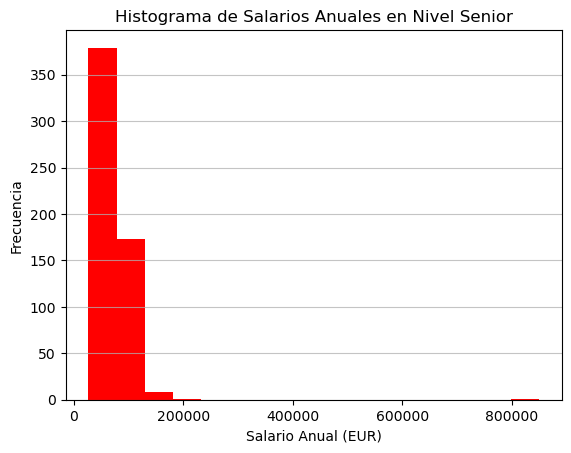

In [20]:
#Mostramos los datos en un histograma
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hist(ax, salaries2020_senior.select('YearSalary'), bins=16, color=['red'])
plt.title("Histograma de Salarios Anuales en Nivel Senior")
plt.xlabel("Salario Anual (EUR)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.75)

In [21]:
#Ya que hay algunos outliers, procederemos a filtrar los datos usando como regla los cuartiles, para descartar todos los datos menores de Q1 y mayores a Q3
quartiles = salaries2020_senior.approxQuantile("YearSalary", [0.25, 0.75], 0.01)
q1 = quartiles[0]
q3 = quartiles[1]
iqr = q3 - q1
salaries2020_senior_clean = salaries2020_senior.filter((col("YearSalary") >= (q1 - 1.5 * iqr)) & (col("YearSalary") <= (q3 + 1.5 * iqr)))
salaries2020_senior_clean.count()

523

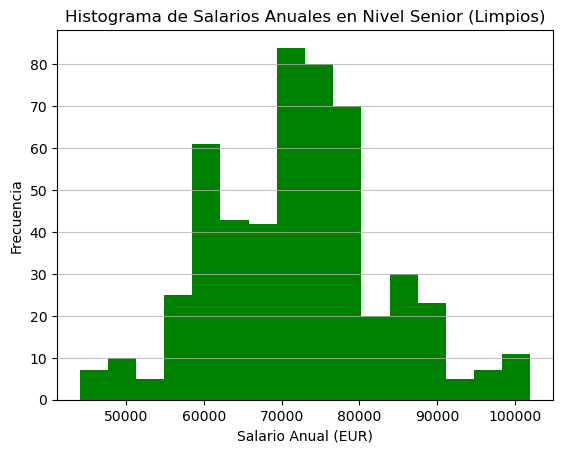

In [22]:
#Mostramos los datos en un histograma
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hist(ax, salaries2020_senior_clean.select('YearSalary'), bins=16, color=['green'])
plt.title("Histograma de Salarios Anuales en Nivel Senior (Limpios)")
plt.xlabel("Salario Anual (EUR)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.75)

In [23]:
#Procedemos a comparar los estadisticas entre hombres y mujeres
#Primero sacamos el analisis descriptivo entre generos
stats_gender = salaries2020_senior_clean.groupBy("Gender").agg(
    f.count("YearSalary").alias("count"),
    f.mean("YearSalary").alias("mean"),
    f.stddev("YearSalary").alias("stddev"),
    f.min("YearSalary").alias("min"),
    f.max("YearSalary").alias("max")
)
stats_gender.show()

+------+-----+-----------------+------------------+-------+--------+
|Gender|count|             mean|            stddev|    min|     max|
+------+-----+-----------------+------------------+-------+--------+
|Female|   56|66751.78571428571|11089.929765683468|45000.0| 88000.0|
|  Male|  467|72751.67665952891| 10847.37206522423|44000.0|102000.0|
+------+-----+-----------------+------------------+-------+--------+



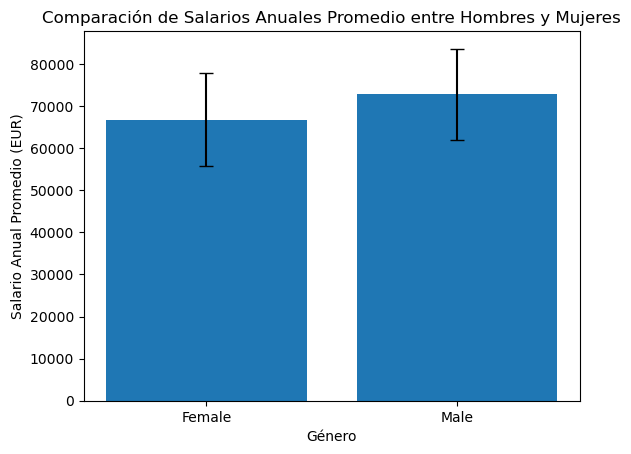

In [24]:
#Graficamos los datos
import pandas as pd
gender_data = stats_gender.select("Gender", "mean", "stddev").collect()


df = pd.DataFrame(gender_data, columns=["Gender", "mean", "stddev"])

# Plotting
plt.bar(df['Gender'], df['mean'], yerr=df['stddev'], capsize=5)
plt.xlabel("Género")
plt.ylabel("Salario Anual Promedio (EUR)")
plt.title("Comparación de Salarios Anuales Promedio entre Hombres y Mujeres")
plt.show()

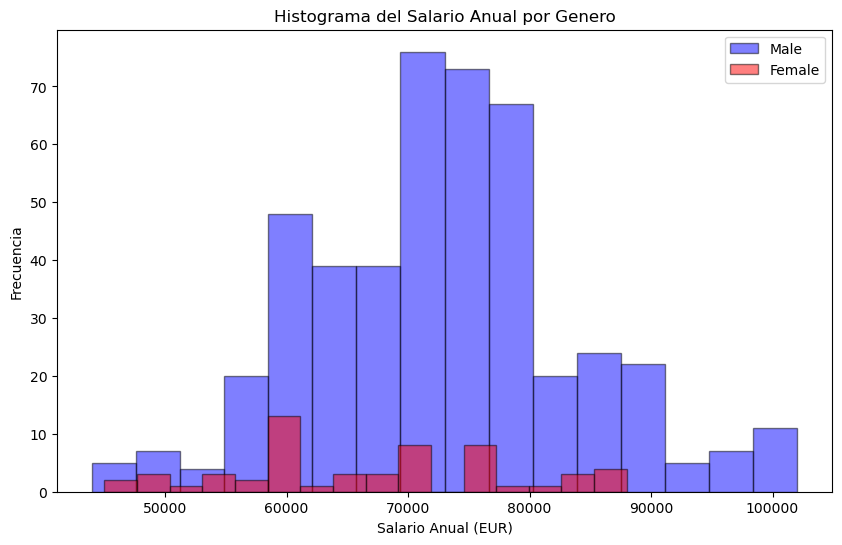

In [30]:
#Graficamos en histogramas separados
male_salaries = salaries2020_senior_clean.filter(col("Gender") == "Male").select("YearSalary").toPandas()
female_salaries = salaries2020_senior_clean.filter(col("Gender") == "Female").select("YearSalary").toPandas()

plt.figure(figsize=(10, 6))

plt.hist(male_salaries["YearSalary"], bins=16, alpha=0.5, label="Hombres", color='blue', edgecolor='black')
plt.hist(female_salaries["YearSalary"], bins=16, alpha=0.5, label="Mujeres", color='red', edgecolor='black')

plt.title("Histograma del Salario Anual por Genero")
plt.xlabel("Salario Anual (EUR)")
plt.ylabel("Frecuencia")

plt.legend()

plt.show()

#### 2.1.2.1 Conclusiones
- **Brecha Salarial de Género:** Los resultados muestran una brecha salarial de género en el nivel senior en Alemania, con los hombres ganando en promedio más que las mujeres. Esta diferencia puede estar influenciada por varios factores como pueden ser el rol específico, la experiencia y las habilidades adicionales.

- **Variabilidad Salarial:** La similitud en la desviación estándar entre los géneros sugiere que la dispersión de los salarios es comparable, pero la diferencia en los salarios máximos sugiere posibles desigualdades en el acceso a los puestos mejor remunerados.
- **Poca cantidad de datos**: La cantidad de registros (56 para mujeres frente a 467 para hombres) puede sugerir que las carreras relacionadas con IT no atraen tanto a las mujeres, o que hay menos mujeres en niveles senior. Sin embargo, considerando que estos datos son del 2020 y que para alcanzar el nivel senior se requieren varios años de experiencia, es probable que en la actualidad haya más mujeres en este campo. Sería valioso realizar análisis adicionales comparando los datos de diferentes años para identificar posibles tendencias de aumento en la representación femenina en niveles senior.

In [ ]:
### 